In [7]:
from flygym.arena import FlatTerrain
from flygym import SingleFlySimulation, Camera, Fly
from flygym.examples.vision import ObstacleOdorArena
import numpy as np

In [26]:
def sample_points(
    rmin=3,
    rmax=15,
    min_sep=4,
    n=1000,
    max_iter=10000,
    seed=None,
):
    rng = np.random.RandomState(seed)
    
    def sample():
        r = np.sqrt(rng.uniform(rmin * rmin, rmax * rmax))
        theta = rng.uniform(0, 2 * np.pi)
        return r * np.cos(theta), r * np.sin(theta)

    points = np.array([sample()])
    count = 0
    for _ in range(max_iter):
        point = sample()
        if np.linalg.norm(points - point, axis=1).min() >= min_sep:
            points = np.vstack([points, point])
            count += 1
            if count >= n:
                break
    return points

pos = sample_points(seed=0)

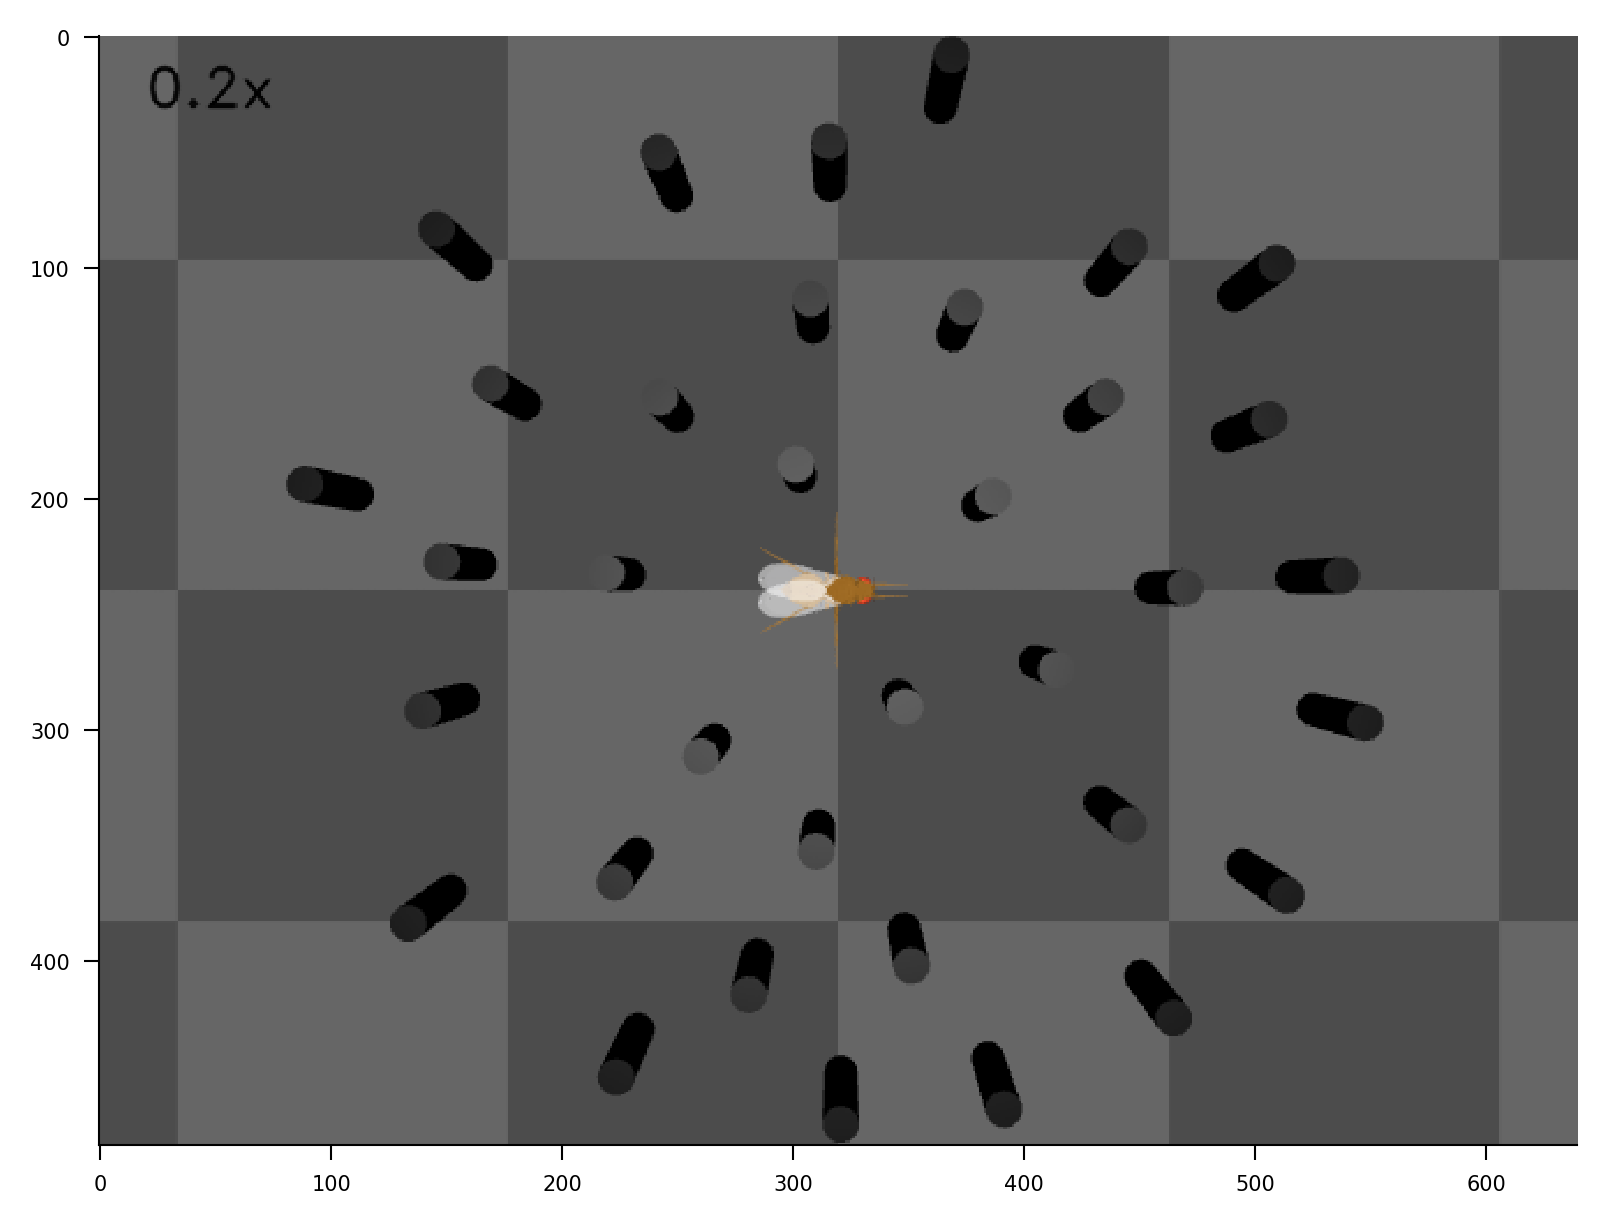

In [27]:
import matplotlib.pyplot as plt

class Arena(ObstacleOdorArena):
    def __init__(self, **kwargs):
        super().__init__(**kwargs, terrain=FlatTerrain())

fly = Fly(
    enable_vision=True,
    render_raw_vision=True,
)
arena = Arena(
    obstacle_positions=pos,
    obstacle_radius=0.5,
)
cam = Camera(attachment_point=fly.model.worldbody, camera_name="camera_top_zoomout")
sim = SingleFlySimulation(fly=fly, arena=arena, cameras=[cam])
obs, info = sim.reset()
plt.imshow(sim.render()[0])

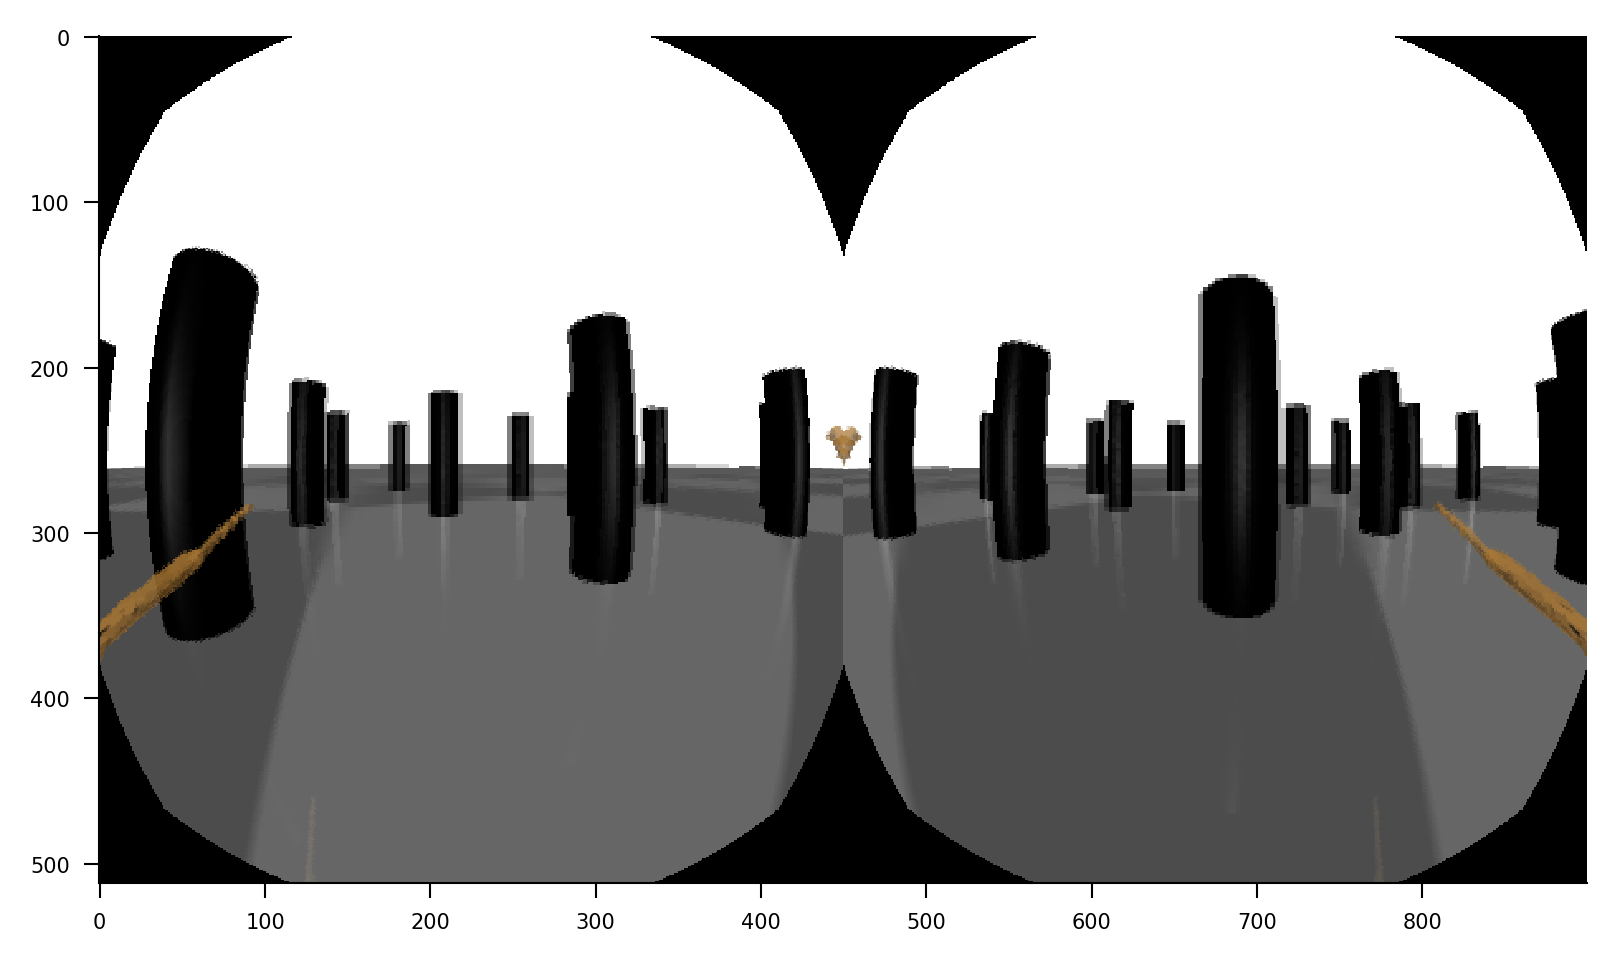

In [28]:
plt.imshow(np.concatenate(info["raw_vision"] / 255, axis=1))